In [ ]:
import os
import zipfile

In [ ]:
local_zip = '/content/galaxies.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/content/galaxies_test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [ ]:
spiral_dir = os.path.join('/tmp/galaxies/spiral')
elliptical_dir = os.path.join('/tmp/galaxies/ellipse')
irregular_dir = os.path.join('/tmp/galaxies/irregular')

print('total training spiral:', len(os.listdir(spiral_dir)))
print('total training ellipse:', len(os.listdir(elliptical_dir)))
print('total training irregular:', len(os.listdir(irregular_dir)))

spiral_files = os.listdir(spiral_dir)
print(spiral_files[:10])

elliptical_files = os.listdir(elliptical_dir)
print(elliptical_files[:10])

irregular_files = os.listdir(irregular_dir)
print(irregular_files[:10])

total training spiral: 51
total training ellipse: 36
total training irregular: 17
['download (3).jpg', 'images (31).jpg', 'images (26).jpg', '8.jpg', 'download.jpg', '5.jpg', 'images (18).jpg', 'download (12).jpg', 'images (11).jpg', 'images (4).jpg']
['14.jpg', 'download (3).jpg', '17.jpg', 'download.jpg', 'images (18).jpg', 'images (11).jpg', 'images (4).jpg', 'download (7).jpg', 'images (8).jpg', 'images (3).jpg']
['download (3).jpg', 'download.jpg', 'images (4).jpg', 'download (7).jpg', 'images (8).jpg', 'images (3).jpg', 'download (4).jpg', 'images (9).jpg', 'images (7).jpg', 'images.jpg']


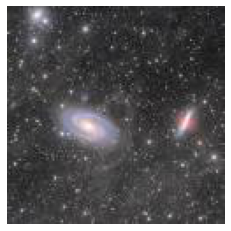

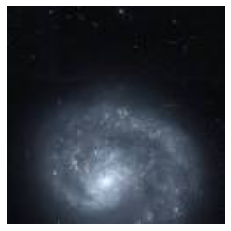

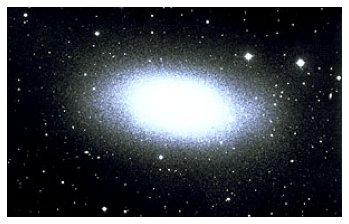

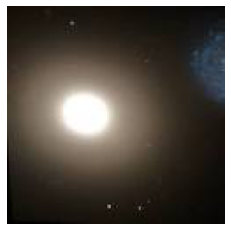

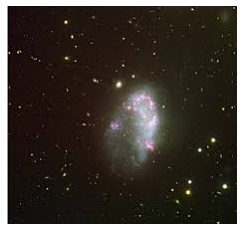

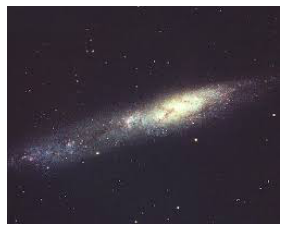

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_spiral = [os.path.join(spiral_dir, fname)
                for fname in spiral_files[pic_index-2:pic_index]]
next_ellipse = [os.path.join(elliptical_dir, fname)
                for fname in elliptical_files[pic_index-2:pic_index]]
next_irregular = [os.path.join(irregular_dir, fname)
                for fname in irregular_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_spiral+next_ellipse+next_irregular):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.python import keras
print(tf.__version__)
print(keras.__version__)

1.15.2
2.2.4-tf


In [ ]:
TRAINING_DIR = "/tmp/galaxies/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=180,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/galaxies_test/"
validation_datagen = ImageDataGenerator(rescale = 1./255)



In [ ]:
train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  shuffle=False
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  shuffle=False
)

Found 104 images belonging to 3 classes.
Found 19 images belonging to 3 classes.


In [ ]:
train_generator.class_indices

{'ellipse': 0, 'irregular': 1, 'spiral': 2}

In [ ]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])



Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________

In [ ]:
history = model.fit_generator(train_generator, epochs=100,
                              validation_data = validation_generator,
                              verbose = 1, steps_per_epoch = 8)



Epoch 1/100
8/8 [==============================] - 8s 1s/step - loss: 2.4494 - acc: 0.3462 - val_loss: 1.0028 - val_acc: 0.5263
Epoch 2/100
8/8 [==============================] - 1s 154ms/step - loss: 1.1902 - acc: 0.4904 - val_loss: 0.9745 - val_acc: 0.5263
Epoch 3/100
8/8 [==============================] - 1s 174ms/step - loss: 1.0323 - acc: 0.4904 - val_loss: 0.9508 - val_acc: 0.5263
Epoch 4/100
8/8 [==============================] - 1s 176ms/step - loss: 1.0370 - acc: 0.4904 - val_loss: 0.9568 - val_acc: 0.5263
Epoch 5/100
8/8 [==============================] - 1s 178ms/step - loss: 1.0728 - acc: 0.4904 - val_loss: 0.9660 - val_acc: 0.5263
Epoch 6/100
8/8 [==============================] - 1s 168ms/step - loss: 1.0332 - acc: 0.4904 - val_loss: 0.9644 - val_acc: 0.5263
Epoch 7/100
8/8 [==============================] - 1s 179ms/step - loss: 1.0350 - acc: 0.4904 - val_loss: 0.9722 - val_acc: 0.5263
Epoch 8/100
8/8 [==============================] - 1s 172ms/step - loss: 1.0049 - acc:

In [ ]:
model.save("/tmp/galaxy.h5")

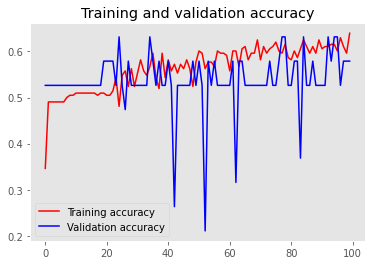

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.grid()
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

Saving 100122.jpg to 100122.jpg
{'ellipse': 0, 'irregular': 1, 'spiral': 2}
ellipse


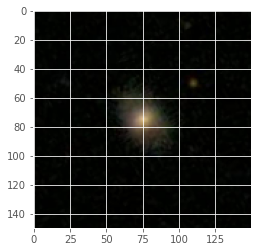

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  plt.imshow(img)

  images = np.vstack([x])
  classes = model.predict_classes(images)
  print(train_generator.class_indices)
  if classes[0] == 0:
    print('ellipse')
  elif classes[0] == 1:
    print('Irregular')
  else:
    print('spiral')